### Diabetes Prediction Using Machine Learning

#### What is Diabetes?
Diabetes is the leading cause of kidney disease because ongoing high blood glucose (blood sugar) can damage your kidney's blood vessels. Keep your blood glucose in range by eating well and maintaining a physical activity schedule that works best for you to lower your risk of kidney disease.

Here we using machine to predict diabetes, using machine learning. 

#### Symptoms under Question


In [11]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [3]:
df = pd.read_csv('diabetes_data_upload.csv')

In [4]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [5]:
print(df.dtypes)

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object


In [23]:
cat_features = df[['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                  'Genital thrush','visual blurring','Itching','Irritability','delayed healing',
                  'partial paresis','muscle stiffness','Alopecia','Obesity']]

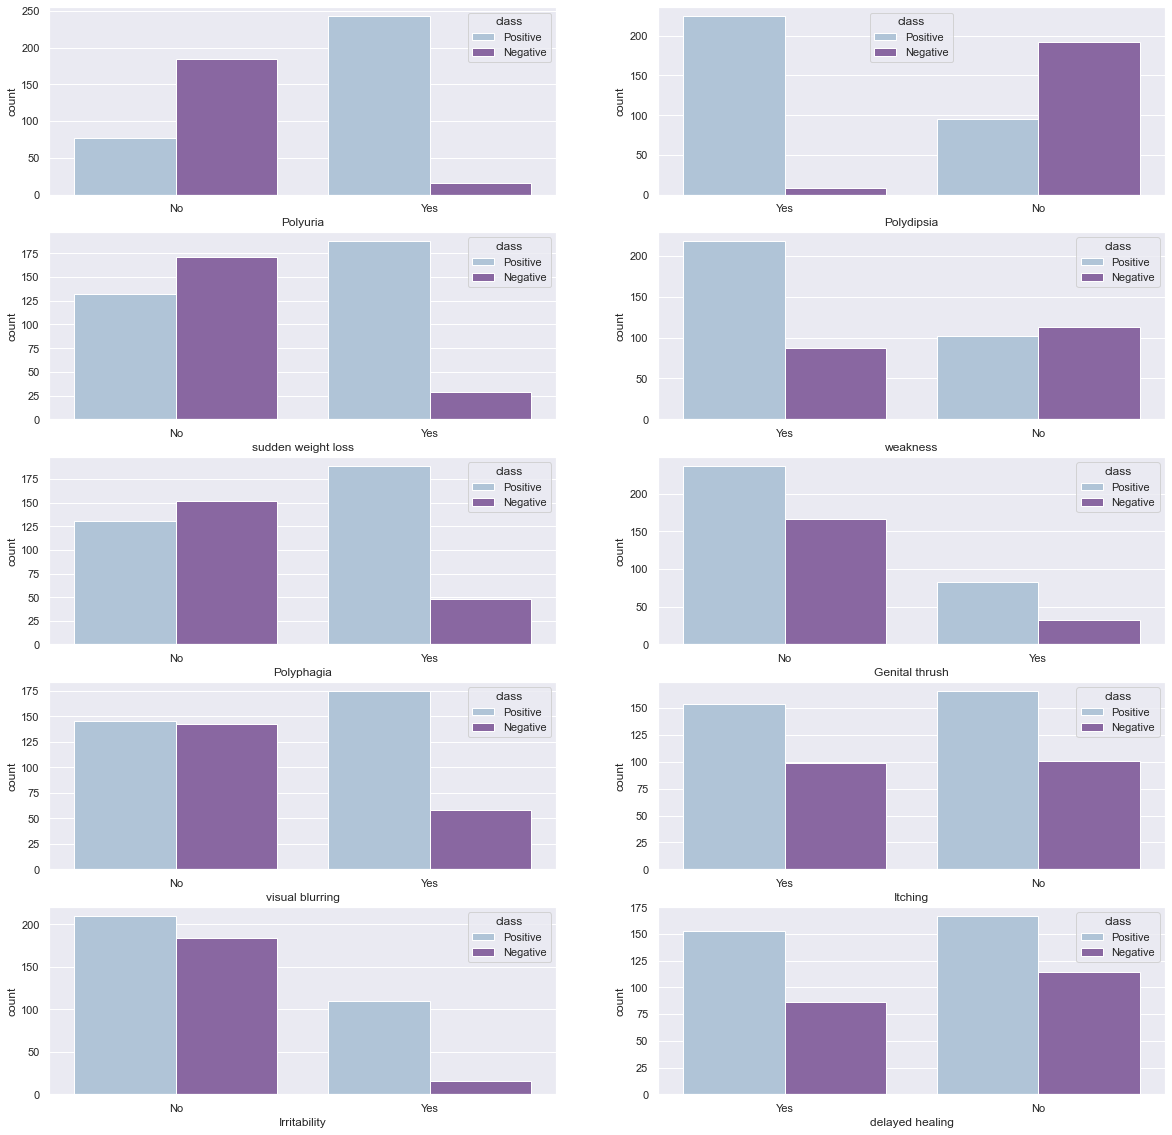

In [32]:
#fig , ax = plt.subplots(4,4,figsize = (15,15)) # set up 2 x 2 frame count plot with figsize 10 x 10

fig , ax = plt.subplots(5,2,figsize = (20,20))
for i , subplots in zip (cat_features, ax.flatten()):  
  sn.countplot(cat_features[i],hue = df['class'],ax = subplots, palette = 'BuPu')
plt.show()

In [ ]:
cat_features1 = df[['partial paresis','muscle stiffness','Alopecia','Obesity']]

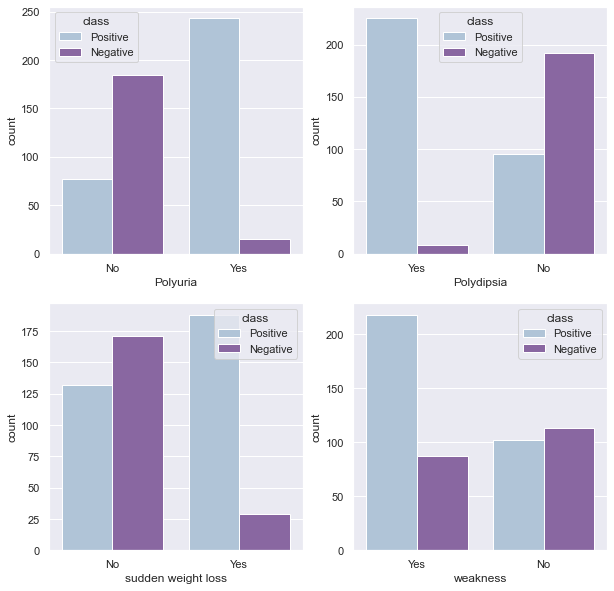

In [35]:
fig , ax = plt.subplots(2,2,figsize = (10,10))
for i , subplots in zip (cat_features, ax.flatten()):  
  sn.countplot(cat_features[i],hue = df['class'],ax = subplots, palette = 'BuPu')
plt.show()

### Data Visualization

<AxesSubplot:xlabel='class', ylabel='count'>

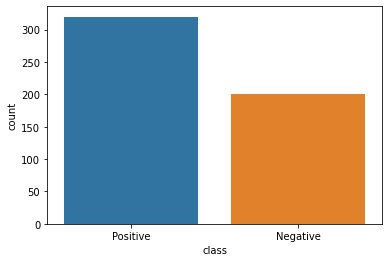

In [6]:
#visualization of Diabetes Distribution

sn.countplot(x='class', data = df)

<AxesSubplot:xlabel='Age', ylabel='count'>

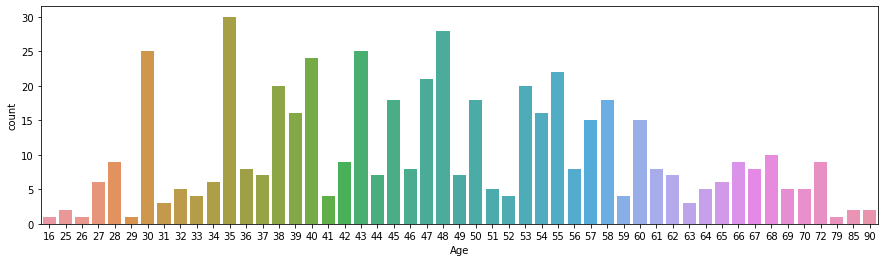

In [14]:
#visualization of Distribution by Age Group
plt.figure(figsize=(15,4))
sn.countplot(x='Age', data = df)

In [21]:
#creating positive class 
pos_df = df[df['class'] == 'Positive']

#dropping age for data visualization
pos_df1 = pos_df.drop('Age', axis = 1)

<AxesSubplot:xlabel='Age', ylabel='count'>

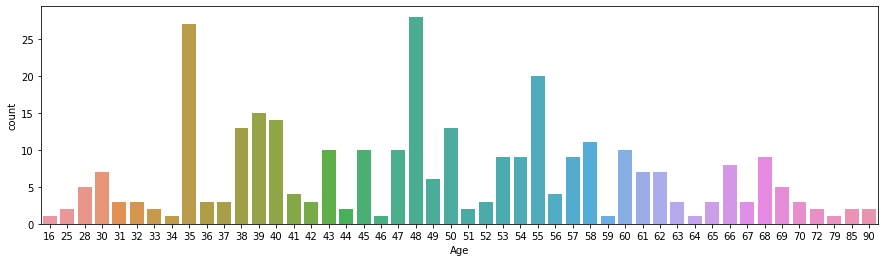

In [15]:
#visualization of Diabetes Distribution By Age
plt.figure(figsize=(15,4))
sn.countplot(x='Age', data = pos_df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

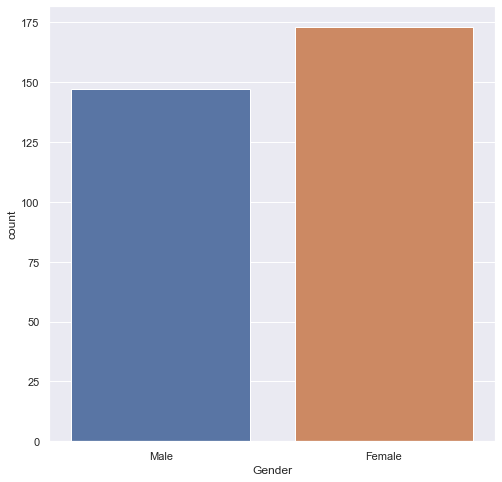

In [36]:
#Gender Distribution of postive classes
sn.countplot(x= pos_df.Gender, data = pos_df)

In [17]:
df1 = pd.get_dummies(df, drop_first = True)

In [18]:
df1.head(5)

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [19]:
data_corrs = df1.corr()['class_Positive'].map(abs).sort_values(ascending = False)
data_corrs

class_Positive            1.000000
Polyuria_Yes              0.665922
Polydipsia_Yes            0.648734
Gender_Male               0.449233
sudden weight loss_Yes    0.436568
partial paresis_Yes       0.432288
Polyphagia_Yes            0.342504
Irritability_Yes          0.299467
Alopecia_Yes              0.267512
visual blurring_Yes       0.251300
weakness_Yes              0.243275
muscle stiffness_Yes      0.122474
Genital thrush_Yes        0.110288
Age                       0.108679
Obesity_Yes               0.072173
delayed healing_Yes       0.046980
Itching_Yes               0.013384
Name: class_Positive, dtype: float64

<AxesSubplot:>

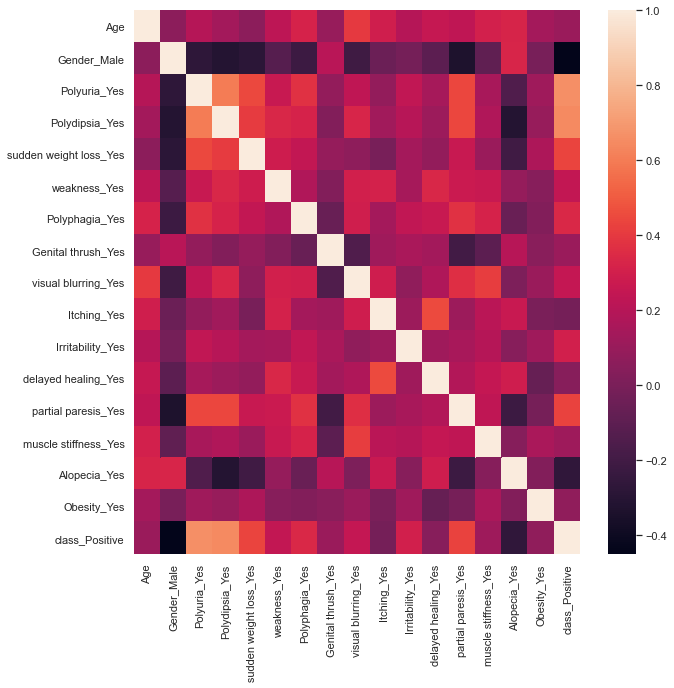

In [20]:
#seaborn heatmap, to visualize correlation
sn.set(rc= {'figure.figsize':(10,10)})
sn.heatmap(df1.corr())

### Identify X & Y, and Logistic Regression using Statsmodels
Prior to running and building our machine learning models, need to look at correlation with our target variable. We do so by looking at the P-value of the coefficients. A P value <= 0.05 has statistical significance.

Logistic regression is the type of regression analysis used to find the probability of a certain event occurring. It is the best suited type of regression for cases where we have a categorical dependent variable which can take only discrete values.


Second we identify are our target (Y) and response variables (X).

The add_constant = 

In [41]:
from statsmodels.tools import add_constant as add_constant

In [42]:
#Identifying Y(target) and X (Response Variables)
y = df1['class_Positive']
X = df1.drop('class_Positive', axis = 1)

In [43]:
import statsmodels.api as sm
# Creating intercept term required for sm.Logit
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

#results of the fit
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


In [44]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         class_Positive   No. Observations:                  520
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                           16
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                     inf
Time:                        21:55:10   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.7466      1.075      2.554      0.011       0.639       4.854
Age                       -0.0512      0.025     -2.017      0.044      -0.101      -0.001
Gender_Male               -4.3512      0.598     -7.274      0.000      -5.524      -3.179
Polyuria_Yes               4.4395      0.705      6.295      0.000       3.057       5.822
Polydipsia_Yes             5.0704      0.829      6.117      0.000       3.446       6.695
sudden weight loss_Yes     0.1903      0.548      0.348      0.728      -0.883       1.264
weakness_Yes               0.8171      0.537      1.522      0.128      -0.235       1.869
Polyphagia_Yes             1.1938      0.534      2.238      0.025       0.148       2.239
Genital thrush_Yes         1.8637      0.553      3.368      0.001       0.779       2.948
visual blurring_Yes        0.9159      0.651      1.406      0.160      -0.360       2.192
Itching_Yes               -2.8029      0.673     -4.167      0.000      -4.121      -1.485
Irritability_Yes           2.3407      0.591      3.964      0.000       1.183       3.498
delayed healing_Yes       -0.3916      0.550     -0.712      0.476      -1.470       0.686
partial paresis_Yes        1.1593      0.525      2.209      0.027       0.131       2.188
muscle stiffness_Yes      -0.7288      0.580     -1.256      0.209      -1.866       0.408
Alopecia_Yes               0.1504      0.620      0.242      0.808      -1.065       1.366
Obesity_Yes               -0.2890      0.544     -0.531      0.595      -1.356       0.778
==========================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Selecting columns that have significant p <=0.05
These variables will be selected, as they have a P-Value P<= 0.05. The rest have no statistical significance with target variable

In [45]:
cols = ['Age', 'Gender_Male', 'Polyuria_Yes','Polydipsia_Yes', 'Polyphagia_Yes', 'Genital thrush_Yes',
       'Itching_Yes', 'Irritability_Yes', 'partial paresis_Yes']

### Re-running Logistic Regression Model, this time to look at Odds Ratio

In [46]:
y = df1['class_Positive']
X = df1[cols]

# Creating intercept term required for sm.Logit
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

#results of the fit
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 9


### Odds Ratio
In logistic regression the odds ratio represents the constant effect of a predictor X, on the likelihood that one outcome will occur.

Odds ratios (OR) are used to compare the relative odds of the occurrence of the outcome of interest, given exposure to the variable of interest. The odds ratio can also be used to determine whether a particular exposure is a risk factor for a particular outcome.

**OR=1** Exposure does not affect odds of outcome

**OR>1** Exposure associated with higher odds of outcome

**OR<1** Exposure associated with lower odds of outcome

In [47]:
#Statistical information regarding confidence intervals, P-values and Odds Ration
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                     CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                    3.104935     119.452825   19.258589   0.001
Age                      0.913527       0.991045    0.951497   0.017
Gender_Male              0.003785       0.036593    0.011769   0.000
Polyuria_Yes            19.809786     200.305053   62.992066   0.000
Polydipsia_Yes          41.476452     744.445256  175.718376   0.000
Polyphagia_Yes           1.308163       8.150403    3.265281   0.011
Genital thrush_Yes       2.137282      14.695090    5.604245   0.000
Itching_Yes              0.035547       0.266386    0.097310   0.000
Irritability_Yes         3.748737      28.907751   10.409974   0.000
partial paresis_Yes      1.457535       8.897671    3.601203   0.005


### Interpreting Odds Ratio
Patients with **Polyuria** are 62  times likely to be diabetic.

Patients with **Polydipsia** are 175 times more likely to be diabetic

Patients with **Polyphagia** are 3 times more likely to be diabetic

Patients with **Genital thrush** are 5 times more likely to be diabetic

Patients with **irritability** are 10 times more likely to be diabetic

Patients with **partial paresis** are 3 times more likely to be diabetic

Patients with **Ithching** alone are 3% less likely to be a diabetic indicator.

Patients **Age** alone are 5% less likely to be a diabetic indicator.

Patients **Gender** 99% less likely alone to be an indicator for a diabetes


### Prepping for The Machine Learning Models
First, we identify our 'Y', in which case is 'class_Positive' and our 'X' will be the columns who had strong statistical relevance with our target variable 'Y', as I discussed above.

Also using value counts, I wanted to look at class distribution of of the class_Positive. That is what 'value_counts' provides.

By setting 'normalize=True' , the object returned will contain the relative frequencies of the unique values.


In [48]:
y = df1['class_Positive']
X = df1[cols]


# Class distribution - Pre-SMOTE
print('Original class distribution: \n')
print(y.value_counts())
print(y.value_counts(normalize = True))

Original class distribution: 

1    320
0    200
Name: class_Positive, dtype: int64
1    0.615385
0    0.384615
Name: class_Positive, dtype: float64


### Train Test Split
Train Test Split here splits the data into test sets and train sets. We set the test size to 0.25, or 25% of the data.

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

Train Dataset: Used to fit the machine learning model.

Test Dataset: Used to evaluate the fit machine learning model.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=123)

### SMOTE: Synthetic Minority Over-sampling Technique
Because 61% of our data was 'positive' and 38% was 'negative', there is a large class imbalance. This will be fixed using SMOTE

SMOTE stands for **Synthetic Minority Oversampling**. Here, rather then simply oversampling the minority class with replacement (which simply adds duplicate cases to the dataset), the algorithm generates new sample data by creating 'synthetic' examples that are combinations of the closest minority class cases.



In [50]:
smote = SMOTE(random_state = 777)
X_train, y_train = smote.fit_sample(X_train, y_train)

# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(y_train.value_counts())

-----------------------------------------
Synthetic sample class distribution: 

0    238
1    238
Name: class_Positive, dtype: int64


#### LOGISTIC REGRESSION
Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more independent variables.

First starting out, we will instantiate the model.

Next we set the paramerters for grid searchCV. Here we are using Solver, which is an algorithm used in the optimization problem. For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones. Another parameter is penalty, which specifies the norm of the penalty,None: no penalty is added, l2: l2 penalty added, and l1: l1 penalty is added, and elasticnet: both l1 and l2 penalty are added.


Then we use GridsearchCV. GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.

we fit the data, and then use **.best_params_** which tells use the best parameters for our model. Lastly given the parameters to use, we Instantiate them model with set parameters.

In [51]:
log_clf = LogisticRegression()

In [52]:
#Parameters for GridSearchCV
log_grid = {'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
           'penalty': ['l1', 'l2', 'None', 'elasticnet']}

In [53]:
log = GridSearchCV(log_clf, log_grid, scoring = 'accuracy', cv = 3)

In [54]:
log.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'None', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [55]:
log.best_params_

{'penalty': 'l2', 'solver': 'lbfgs'}

In [56]:
log = LogisticRegression(penalty = 'l2', solver = 'lbfgs', random_state = 777)

In [57]:
log.fit(X,y)

LogisticRegression(random_state=777)

In [58]:
log_predict = log.predict(X_test)

### Drawing ROC Curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

**True Positive Rate** The true positive rate (TPR, also called sensitivity). TPR is the probability that an actual positive will test positive.

**False Positive Rate** The False Positive Rate (FPR, or “Fall-Out”), is the proportion of negative cases incorrectly identified as positive cases in the data (i.e. the probability that false alerts will be raised).

In [61]:
from sklearn.metrics import roc_curve, auc

#Used to calculate the probability of scores of each of the datapoints
y_score = log.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

### Area Under The Curve (AUC)
The Area Under the Curve (AUC) is the measure of the ability of a classifier(In this case Logistic Regression) to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes

In [62]:
#calculating the AUC
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.9795477642276422


AUC: 0.9795477642276422


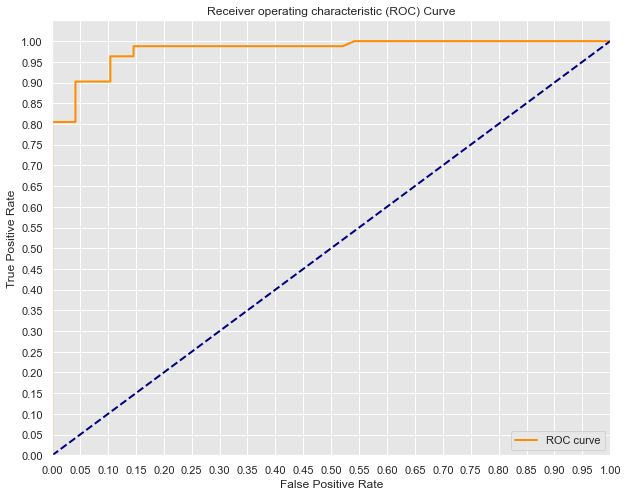

In [63]:
#Visualization of the AUC

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### The Area Under the Curve (AUC) in this case our model has a score of 0.97/1.00 or 97%


### Confusion matrix for binary classification
In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm.

I already discussed the true positive rate, and the false positive rate.

The other two included in the confusion matrix are

**true negative rate(TN)** - A test result that correctly indicates the absence of a condition or characteristic

**false negative rate (FN)** - A test result which wrongly indicates that a particular condition or attribute is absent

First we create predictions

Next, using the confusion plot we Y_test set with predictions to get True Positive Rate, False Positive Rate, True Negative Rate, and False Negative Rate.

In [64]:
#Predictions on Test Set
log_predict = log.predict(X_test)

In [67]:
#Calculating the accuracy score by comparing the actual values and predicted values.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, log_predict)

TN, FP, FN, TP = confusion_matrix(y_test, log_predict).ravel()
#TN, FP, FN, TP = confusion_matrix(y_test, predictions)

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  76
False Positive(FP) =  5
True Negative(TN)  =  43
False Negative(FN) =  6
Accuracy of the binary classification = 0.915


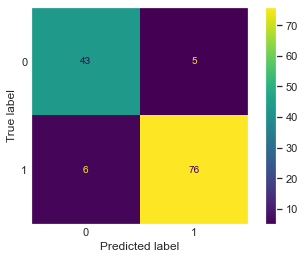

In [69]:
#Visual Representation of the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(log,X_test,y_test)

plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

### Classification report
**Precision**: Percentage of correct positive predictions relative to total positive predictions.

**Recall**: Percentage of correct positive predictions relative to total actual positives.

**F1 Score**: A weighted harmonic mean of precision and recall. The closer to 1, the better the model. 

F1 Score =  2 * (Precision * Recall) / (Precision + Recall)

**Accuracy**: One of the more obvious metrics, it is the measure of all the correctly identified cases. It is most used when all the classes are equally important.

In [70]:
#evaluation metrics of Logistic Regression Model
print (classification_report(y_test, log_predict))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        48
           1       0.94      0.93      0.93        82

    accuracy                           0.92       130
   macro avg       0.91      0.91      0.91       130
weighted avg       0.92      0.92      0.92       130



### Interpretation of classification report

Precision: Out of all the patients that the model predicted would have diabetes, only 94% actually did.

Recall: Out of all the cusomters that actually did have diabetes, the model only predicted this outcome correctly for 93% of those patients

f1 score: with an f1 score of 0.93, the model did a really great job of predicting whether or not customers will have diabetes.

**The Confusion matrix performance on the Logistic Regresson classifier shows accuracy score of 92%**





### KNN - K-NEAREST NEIGHBORS
The k-nearest neighbors (KNN) algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.

The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems.

First starting out, we will instantiate the model.

Next we set the paramerters for grid searchCV. Here we are using n_neighbors, which is number of neighbors required for each sample.

Then we use GridsearchCV. GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.

we fit the data, and then use .best_params_ which tells use the best parameters for our model. Lastly given the parameters to use, we Instantiate them model with set parameters.

In [71]:
#Calling out the classifier
knn_clf = KNeighborsClassifier()

In [72]:
#Parameters for GridSearchCV
knn_grid = {
    'n_neighbors':[1,2,3,4,5,6,7,8]
}

In [73]:
knn = GridSearchCV(knn_clf, knn_grid, scoring = 'accuracy', cv = 3 )

In [74]:
knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

In [75]:
knn.best_params_

{'n_neighbors': 1}

In [77]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [78]:
knn_prediction = knn.predict(X_test)

### Confusion Matrix with KNN Algorithm

In [79]:
# Evaluating KNN Algorithm
print(confusion_matrix(y_test,knn_prediction))


TN, FP, FN, TP = confusion_matrix(y_test, knn_prediction).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

[[46  2]
 [ 8 74]]
True Positive(TP)  =  74
False Positive(FP) =  2
True Negative(TN)  =  46
False Negative(FN) =  8
Accuracy of the binary classification = 0.923


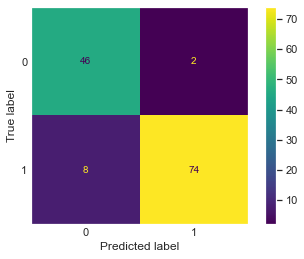

In [80]:
plot_confusion_matrix(knn,X_test,y_test)

plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

### KNN Classification Report

In [82]:
#Printing Classification Report
print (classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        48
           1       0.97      0.90      0.94        82

    accuracy                           0.92       130
   macro avg       0.91      0.93      0.92       130
weighted avg       0.93      0.92      0.92       130



### Interpretation of classification report

Precision: Out of all the patients that the model predicted would have diabetes, only 97% actually did.

Recall: Out of all the cusomters that actually did have diabetes, the model only predicted this outcome correctly for 90% of those patients

f1 score: with an f1 score of 0.94, the model did a really great job of predicting whether or not customers will have diabetes.

**The Confusion matrix performance on the KNN classifier shows accuracy score of 92%**



### DECISION TREE ALGORITHM
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

The nonparametric method refers to a type of statistic that does not make any assumptions about the characteristics of the sample (its parameters) or whether the observed data is quantitative or qualitative.

First starting out, we will instantiate the model.

Next we set the paramerters for grid searchCV. Here we are using criterion, which is the function to measure of quality of split. Entropy can be defined as a measure of the purity of the sub split. max_depth, is the maximum depth of the tree. min_samples_split, is the minimum number of samples required to split an internal node

Then we use GridsearchCV. GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.

we fit the data, and then use .best_params_ which tells use the best parameters for our model. Lastly given the parameters to use, we Instantiate them model with set parameters.

In [84]:
#Instantiating Decision Tree Classifier
dt_clf = DecisionTreeClassifier()

In [93]:
#Parameters for GridSearchCV
dt_grid = {'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 11,12,13,14,15],
    'min_samples_split': [2,3,4, 5, 10, 20]}

In [94]:
#Instantiating GridSearchCV with classifier to find best parameters
dt = GridSearchCV(dt_clf, dt_grid, scoring = 'accuracy', cv = 3 )

In [95]:
#Fitting training dataset
dt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 11, 12, 13, 14, 15],
                         'min_samples_split': [2, 3, 4, 5, 10, 20]},
             scoring='accuracy')

In [96]:
#Finding best parameters for model
dt.best_params_

{'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 2}

In [97]:
#Instantiating Decision Tree with best parameters
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 14, min_samples_split= 2)

In [99]:
#Fitting Training dataset for model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14)

### Decision Tree Confusion matrix

In [100]:
#Creating Predictions
dt_prediction = dt.predict(X_test)

#Creating Confusion Matrix
print(confusion_matrix(y_test,dt_prediction))

TN, FP, FN, TP = confusion_matrix(y_test, dt_prediction).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

[[44  4]
 [ 3 79]]
True Positive(TP)  =  79
False Positive(FP) =  4
True Negative(TN)  =  44
False Negative(FN) =  3
Accuracy of the binary classification = 0.946


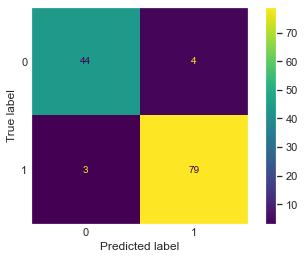

In [101]:
#Visualization of Confusion Matrix
dt_prediction = dt.predict(X_test)
plot_confusion_matrix(dt,X_test,y_test)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

### Feature Importance using Decison Trees
Feature importance, simply put, the higher the value the more important it is

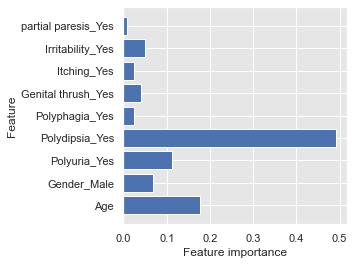

In [102]:
#Visualization of feature importances
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(4,4))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(dt)

#### Interpretation of Feature Importances
Recall, Patients with Polydipsia are 175 times more likely to be diabetic. **BUT** Patients Age alone are 5% less likely to be a diabetic indicator.

### Decision Tree Classification Report

In [103]:
#Creating Classification Report for Model Evaluation

print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        48
           1       0.95      0.96      0.96        82

    accuracy                           0.95       130
   macro avg       0.94      0.94      0.94       130
weighted avg       0.95      0.95      0.95       130



### Interpretation of classification report
Precision: Out of all the patients that the model predicted would have diabetes, only 95% actually did.

Recall: Out of all the cusomters that actually did have diabetes, the model only predicted this outcome correctly for 96% of those patients

f1 score: with an f1 score of 0.96, the model did a really great job of predicting whether or not customers will have diabetes.

**The Confusion matrix performance on the Decision Tree classifier shows accuracy score of 95%**


### Random Forests Model
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

Next we set the paramerters for grid searchCV. Here we are using n_estimators, which is the number of trees in the forest. max_depth, is the maximum depth of the tree.

Then we use GridsearchCV. GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.

we fit the data, and then use .best_params_ which tells use the best parameters for our model. Lastly given the parameters to use, we Instantiate them model with set parameters.

In [104]:
#Instantiating Random Forest Classifier
rf_clf = RandomForestClassifier()

In [110]:
#Parameters for GridSearchCV
rf_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100],
    'max_depth': [1,2,3,4,5,6,7,8,9,10],}

In [111]:
#Instantiating GridSearchCV with classifier to find best parameters
rf = GridSearchCV(rf_clf, rf_grid, scoring = 'accuracy', cv = 3 )

In [112]:
#Fitting Training Dataset
rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy')

In [113]:
#Finding Best Parameters
rf.best_params_

{'max_depth': 8, 'n_estimators': 80}

In [115]:
#Instantiating Random Forest with best parameters
rf = RandomForestClassifier(max_depth = 8, n_estimators = 80, random_state = 123)

In [116]:
#Fitting Training Dataset
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=80, random_state=123)

### Random Forest Confusion Matrix and Classification Report

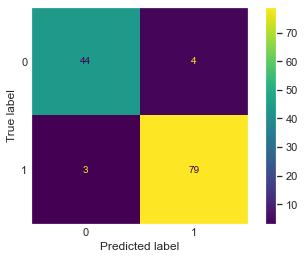

In [119]:
rf_prediction = rf.predict(X_test)

plot_confusion_matrix(dt,X_test,y_test)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

In [120]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        48
           1       0.98      0.98      0.98        82

    accuracy                           0.97       130
   macro avg       0.97      0.97      0.97       130
weighted avg       0.97      0.97      0.97       130



### Interpretation of classification report
Precision: Out of all the patients that the model predicted would have diabetes, only 98% actually did.

Recall: Out of all the cusomters that actually did have diabetes, the model only predicted this outcome correctly for 98% of those patients

f1 score: with an f1 score of 0.98, the model did a really great job of predicting whether or not customers will have diabetes.

**The Confusion matrix performance on the Random Forest classifier shows accuracy score of 97%**

### Feature Importance using Random Forests

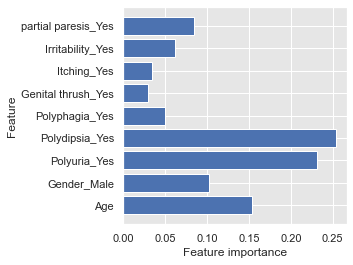

In [121]:
#Visualization of Feature importance for Random Forests
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(4,4))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(rf)

**Recall**

Patients with Polyuria are 62 times likely to be diabetic.

Patients with Polydipsia are 175 times more likely to be diabetic

### Final Results - Model comparisons

**Logistic Regression**                       

Accuracy: 92%                               

F1 Score: 0.93  

**KNN**

Accuracy: 92%

F1 Score: 0.94

**Decision Trees**

Accuracy: 95%

F1 Score: 0.96

**Random Forest**

Accuracy: 97%

F1 Score: 0.98



### Summary of findings
Looking at Odds ratio, we see that International Plan, has an odds ratio greater than one. They are 7 times more likely to leave.

Also customers who have made customer service calls are 55% more likely to leave.

Customers who make international calls are 8% less likely to leave, and customers who have a voicemail plan are 84% less likely to leave

For Logistic Regression, the model had an accuracy score of 0.70

For KNN, the model had an accuracy score of 0.87

For Decision Trees, the model had an accuracy score of 0.87

For Random Forests, the model had an accuracy score of 0.87

Because KNN, Decision Trees, and RandomForests, have the same accuracy. The next best deciding factor is the f1 score.

For KNN, the model had an f1 score of 0.42

For Decison Trees, the model had an f1 score of 0.42

For Random Forests, the model had an f1 score of 0.55

*RANDOM FORESTS IS THE BEST MODEL*

For Logistic Regression, The area under the ROC Curve, is 78.5

Plotting feature importances, using Decision Trees. customer services calls and then total international calls were top two important features

